### We study the SIR infection spreading dynamics system with 3 species (effective dynamics only for S and I) as defined by:

$$
\begin{split}
S + I &\rightarrow^{k_i} 2I \hspace{20pt} \text{Susceptible and Infectious make two infectious}\\
I &\rightarrow^{k_{2I}} \emptyset \hspace{20pt} \text{Infectious people recover or die} \\
R &= S_0 +I_0 - (S+I) \hspace{20pt} \text{Recovered or Dead people} \\
\end{split}
$$

In [1]:
push!(LOAD_PATH, "../src/Achedmy/")
using Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations
# using LaTeXStrings
# using Serialization

In [2]:
SIR_system = @reaction_network begin
    @species S(t) = 5. I(t) = 1.
    @parameters k_i = 0.75 k_2I = 1.
   (k_i), S + I --> I+I
   (k_2I), I --> 0
end

Model ##ReactionSystem#235
States (2):
  S(t) [defaults to 5.0]
  I(t) [defaults to 1.0]
Parameters (2):
  k_i [defaults to 0.75]
  k_2I [defaults to 1.0]

In [ ]:
Graph(SIR_system)

### Insert some Gillespie time traces with code here!

In [3]:
#Parameters simulation
tstart= 0.
tmax = 5.

# atol = 5e-4 #decrease this value to increase the accuracy of the simulation (components smaller than this get rejected!)
# rtol = 5e-3

atol = 1e-3 #decrease this value to increase the accuracy of the simulation (components smaller than this get rejected!)
rtol = 1e-2

k_max = 12 #Maximum order of the adaptive time stepper
dtmax = 0.05
dtini = 1e-5 #Minimum time step size!

Γ = 0.9
qmax = 5.
qmin = 0.5

0.5

In [4]:
alpha_range = [1.]

1-element Vector{Float64}:
 1.0

In [5]:
#@unpack k_i = enzyme_system

SOL = []
VAR = []
STR = []

for i in alpha_range

    #enzyme_system.defaults[k_f] = i

    structure = Achedmy.ReactionStructure(SIR_system)
    variables = Achedmy.ReactionVariables(structure,"cross")
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "gSBR", tmax = tmax, tstart = tstart,
                     atol = atol, rtol = rtol,
                    dtmax = dtmax,
                    # qmax = qmax # , k_max = k_max, γ = Γ, qmax = qmax, qmin = qmin)
                    )
    push!(SOL,sol)
    push!(VAR,variables)
    push!(STR,structure)

end

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.8030695579187065e-5
t: 3.389970799708853e-5
t: 8.790723325642077e-5
t: 0.00022300527346550976
t: 0.0005176375567735956
t: 0.0009807816248634954
t: 0.0018780616035736315
t: 0.003173043141177774
t: 0.005238428152990023
t: 0.00798219792325571
t: 0.011845481720401204
t: 0.016699004045339454
t: 0.02296314059498136
t: 0.030535906451657817
t: 0.03973448946919031
t: 0.05055835275335395
t: 0.06315525873102981
t: 0.07769035358842019
t: 0.09409186024452439
t: 0.11273894332204593
t: 0.13330076848686656
t: 0.15640541563257102
t: 0.18142927021707178
t: 0.20927632485595066
t: 0.2390004168074246
t: 0.2718068014682478
t: 0.3064018279591517
t: 0.34432052577453065
t: 0.3839030005696674
t: 0.42704690338797124
t: 0.4717124600954363
t: 0.517976126815058
t: 0.5663516905825356
t: 0.6163516905825357
t: 0.6663516905825357
t: 0.7163516905825358
t: 0.7663516905825358
t: 0.8163516905825359
t: 0.8663516905825359
t: 0.916351690582536
t: 0.966351690582536
t: 1.01635169058

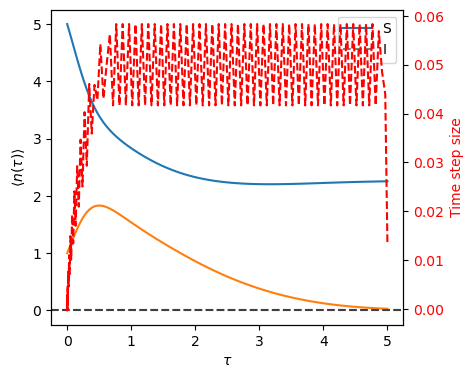

In [6]:
plot_indices = [1]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        axhline(y=0, color="black", linestyle="--", alpha=0.5)
        legend(["S","I"])
    end
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")

    ax2 = gca().twinx()
    ax2.plot(SOL[plot_indices[i]].t, SOL[plot_indices[i]].w[length(SOL[plot_indices[i]].t)], "r--", label="Total")
    # ax2.set_ylabel("Time step size", color="r")
    ax2.tick_params(axis="y", labelcolor="r")
    ax2.set_ylabel("Time step size", color="r")
    #title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
end

gcf()

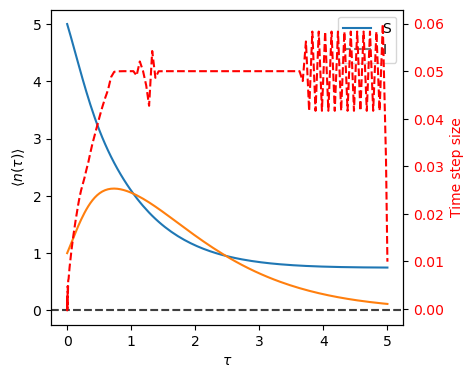

In [6]:
plot_indices = [1]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        axhline(y=0, color="black", linestyle="--", alpha=0.5)
        legend(["S","I"])
    end
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")

    ax2 = gca().twinx()
    ax2.plot(SOL[plot_indices[i]].t, SOL[plot_indices[i]].w[length(SOL[plot_indices[i]].t)], "r--", label="Total")
    # ax2.set_ylabel("Time step size", color="r")
    ax2.tick_params(axis="y", labelcolor="r")
    ax2.set_ylabel("Time step size", color="r")
    #title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
end

gcf()

In [28]:
#@unpack k_i = enzyme_system

SOL_SBR = []
VAR_SBR = []

for i in alpha_range

    #enzyme_system.defaults[k_f] = i

    structure = Achedmy.ReactionStructure(SIR_system)
    variables = Achedmy.ReactionVariables(structure,"single")
    sol = Achedmy.solve_dynamics!(structure,variables, selfEnergy = "SBR", tmax = tmax, tstart = tstart,
                     atol = atol, rtol = rtol) #, k_max = k_max, dtmax = dtmax, γ = Γ, qmax = qmax, qmin = qmin)

    push!(SOL_SBR,sol)
    push!(VAR_SBR,variables)

end

t: 0.0
-5.6249943750.0-0.0-5.625-5.6250098437266210.0-0.0-5.625t: 1.0e-6
-11.250151288584460.0-0.0-11.250054257270744-11.2501512882087060.0-0.0-11.250054256561008t: 5.999999999999999e-6
-16.8755965457836760.0-0.0-16.875757216091767-16.8757294474177330.0-0.0-16.87540310833935t: 2.6748216478716245e-5
-22.502672926441980.0-0.0-22.501831906906332-22.502759914656150.0-0.0-22.501599372818717t: 5.957701798326046e-5
-28.1341865374148630.0-0.0-28.134156567543624-28.135004327035260.0-0.0-28.13197887456843t: 0.0001913445474128495
-33.788413027495790.0-0.0-33.7754046967074-33.788408264941390.0-0.0-33.77538918391444t: 0.0006453778289987037
-39.4995218172124540.0-0.0-39.48181576815693-39.5044965180667940.0-0.0-39.468779214024806t: 0.001833758239586134
-45.31122858995090.0-0.0-45.21571087206935-45.311090657082040.0-0.0-45.21530955601095t: 0.0038535165196912744
-51.353201504778450.0-0.0-51.20384979917092-51.3708777987658960.0-0.0-51.15934826033687t: 0.008580944502794105
-57.784769630381630.0-0.0-57.32

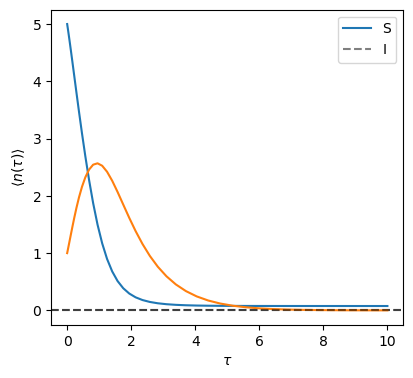

In [29]:
plot_indices = [1]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        plot(SOL_SBR[plot_indices[i]].t,VAR_SBR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        axhline(y=0, color="black", linestyle="--", alpha=0.5)
        legend(["S","I"])
    end
    #title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end

gcf()

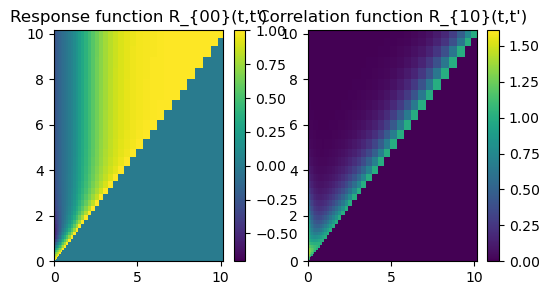

In [32]:
figure(figsize=(6,3))
subplot(121)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(SOL_SBR[1].t,SOL_SBR[1].t,VAR_SBR[1].R[1,:,:])
title("Response function R_{00}(t,t')")
colorbar()
gcf()

subplot(122)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL_SBR[1].t,SOL_SBR[1].t,VAR_SBR[1].R[2,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Correlation function R_{10}(t,t')")
colorbar()
gcf()

In [ ]:
## Reading data

SOL = open("../data/SIR/sol_gSBR.jls", "r") do f
    deserialize(f)
end

VAR = open("../data/SIR/var_gSBR.jls", "r") do f
    deserialize(f)
end

In [ ]:
# ## Saving data

# open("../data/SIR/sol_gSBR.jls", "w") do f
#     serialize(f, SOL)
# end
# open("../data/SIR/var_gSBR.jls", "w") do f
#     serialize(f, VAR)
# end

### Plot the means:

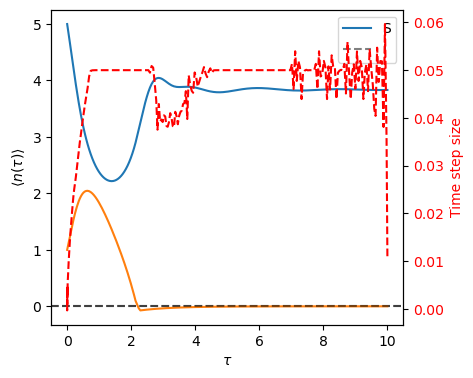

In [6]:
plot_indices = [1]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        axhline(y=0, color="black", linestyle="--", alpha=0.5)
        legend(["S","I"])
    end
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")

    ax2 = gca().twinx()
    ax2.plot(SOL[plot_indices[i]].t, SOL[plot_indices[i]].w[length(SOL[plot_indices[i]].t)], "r--", label="Total")
    # ax2.set_ylabel("Time step size", color="r")
    ax2.tick_params(axis="y", labelcolor="r")
    ax2.set_ylabel("Time step size", color="r")
    #title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
end

gcf()

In [ ]:
plot_indices = [1]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        # plot(SOL[plot_indices[i]].t,VAR[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]])
        # axhline(y=0, color="black", linestyle="--", alpha=0.5)
        # legend(["S","I"])
    end
    #title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end

gcf()

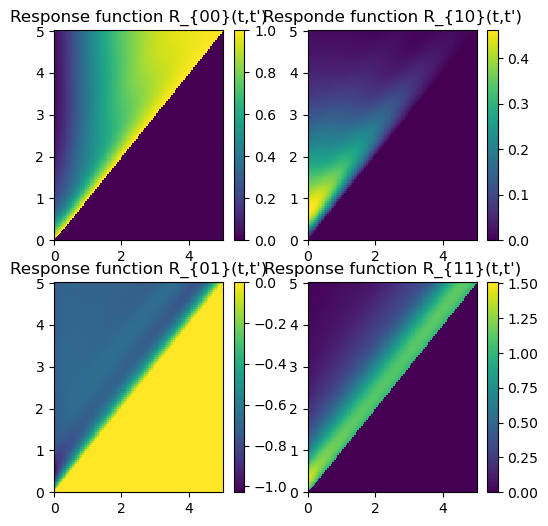

In [9]:
figure(figsize=(6,6))
subplot(221)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[1,1,:,:])
title("Response function R_{00}(t,t')")
colorbar()
gcf()

subplot(222)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[2,1,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Responde function R_{10}(t,t')")
colorbar()
gcf()

subplot(223)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[1,2,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Response function R_{01}(t,t')")
colorbar()
gcf()

subplot(224)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[2,2,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Response function R_{11}(t,t')")
colorbar()
gcf()


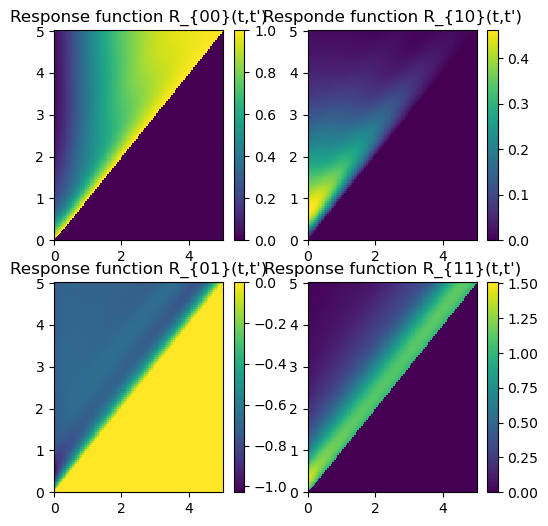

In [8]:
figure(figsize=(6,6))
subplot(221)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[1,1,:,:])
title("Response function R_{00}(t,t')")
colorbar()
gcf()

subplot(222)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[2,1,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Responde function R_{10}(t,t')")
colorbar()
gcf()

subplot(223)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[1,2,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Response function R_{01}(t,t')")
colorbar()
gcf()

subplot(224)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].R[2,2,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Response function R_{11}(t,t')")
colorbar()
gcf()


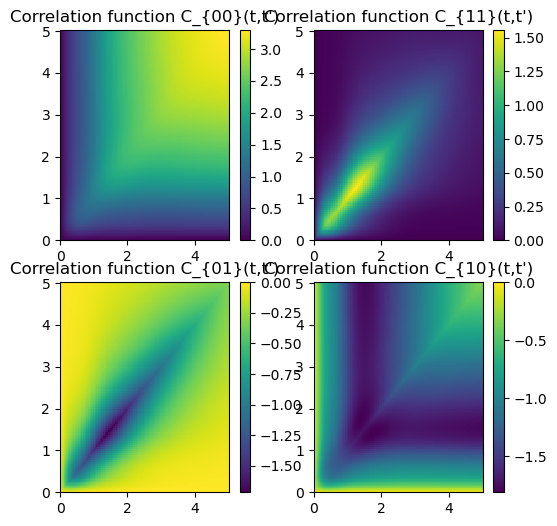

In [7]:
figure(figsize=(6,6))
subplot(221)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[1,1,:,:])
title("Correlation function C_{00}(t,t')")
colorbar()
gcf()

subplot(222)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[2,2,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Correlation function C_{11}(t,t')")
colorbar()
gcf()

subplot(223)
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[1,2,:,:])
title("Correlation function C_{01}(t,t')")
colorbar()
gcf()

subplot(224)
pcolor(SOL[1].t,SOL[1].t,VAR[1].C[2,1,:,:])
title("Correlation function C_{10}(t,t')")
colorbar()
gcf()


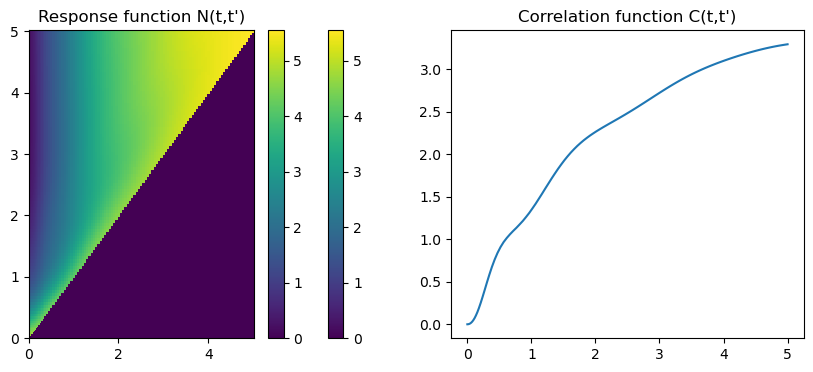

In [11]:
figure(figsize=(10,4))
subplot(121)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].N[1,1,:,:])
title("Response function N(t,t')")
colorbar()
gcf()

subplot(122)
#imshow(variables_aaa.C[1,1,:,:])
plot(SOL[1].t,diag(VAR[1].C[1,1,:,:]))
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Correlation function C(t,t')")
colorbar()
gcf()

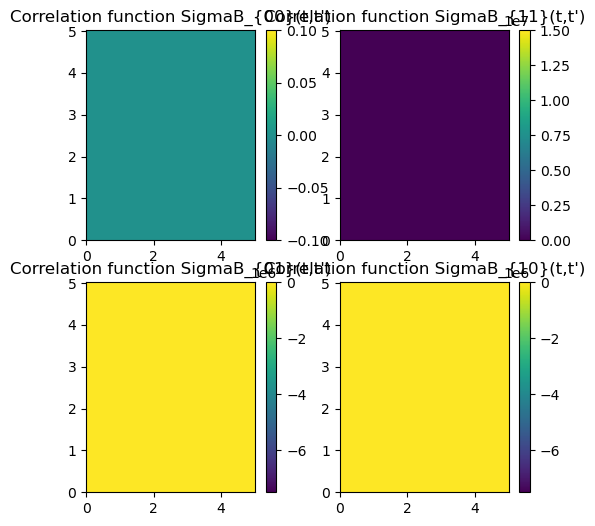

In [12]:
figure(figsize=(6,6))
subplot(221)
#imshow(variables_aaa.R[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].Σ_B[1,1,:,:])
title("Correlation function SigmaB_{00}(t,t')")
colorbar()
gcf()

subplot(222)
#imshow(variables_aaa.C[1,1,:,:])
pcolor(SOL[1].t,SOL[1].t,VAR[1].Σ_B[2,2,:,:])
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Correlation function SigmaB_{11}(t,t')")
colorbar()
gcf()

subplot(223)
pcolor(SOL[1].t,SOL[1].t,VAR[1].Σ_B[1,2,:,:])
title("Correlation function SigmaB_{01}(t,t')")
colorbar()
gcf()

subplot(224)
pcolor(SOL[1].t,SOL[1].t,VAR[1].Σ_B[2,1,:,:])
title("Correlation function SigmaB_{10}(t,t')")
colorbar()
gcf()


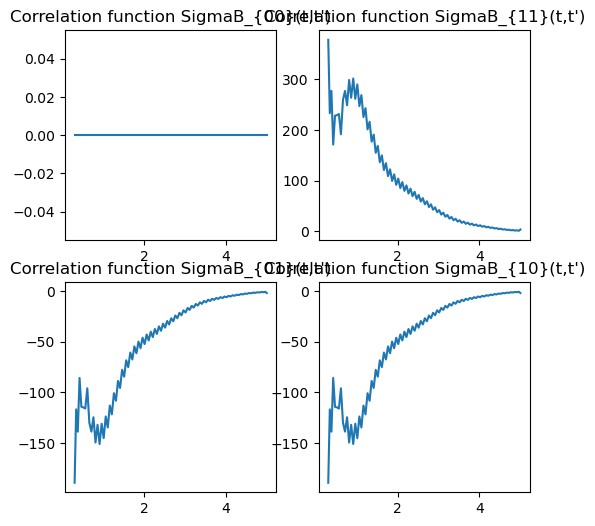

In [21]:
figure(figsize=(6,6))
subplot(221)
M=30
#imshow(variables_aaa.R[1,1,:,:])
plot(SOL[1].t[M:end],diag(VAR[1].Σ_B[1,1,M:end,M:end]))
title("Correlation function SigmaB_{00}(t,t')")
gcf()

subplot(222)
#imshow(variables_aaa.C[1,1,:,:])
plot(SOL[1].t[M:end],diag(VAR[1].Σ_B[2,2,M:end,M:end]))
# pcolor(sol_aaaSBR.t,sol_aaaSBR.t,variables_aaa.C[1,1,:,:])
title("Correlation function SigmaB_{11}(t,t')")
gcf()

subplot(223)
plot(SOL[1].t[M:end],diag(VAR[1].Σ_B[1,2,M:end,M:end]))
title("Correlation function SigmaB_{01}(t,t')")
gcf()

subplot(224)
plot(SOL[1].t[M:end],diag(VAR[1].Σ_B[2,1,M:end,M:end]))
title("Correlation function SigmaB_{10}(t,t')")
gcf()


In [21]:
close("all")

### Plot the variances:

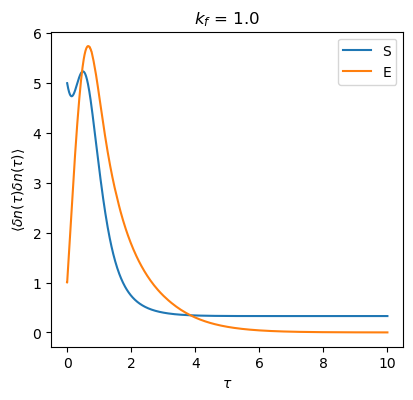

In [24]:
plot_indices = [1]
figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        plot(SOL[plot_indices[i]].t, diag(VAR[plot_indices[i]].N[j,j,:,:]), label=alpha_range[plot_indices[i]])
        legend(["S","E","C","X"])
    end
    title(L"$k_f$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle \delta n(\tau) \delta n(\tau) \rangle$")
end

gcf()

In [26]:
## Running MAK:
#@unpack k_f = enzyme_system

SOL_mak = []
VAR_mak = []

for i in alpha_range

    #enzyme_system.defaults[k_f] = i
    
    # println(enzyme_system.defaults)
    structure = Achedmy.ReactionStructure(SIR_system)
    variables = Achedmy.ReactionVariables(structure,"single")
    sol = Achedmy.solve_dynamics!(structure,variables,selfEnergy = "MAK", tmax = tmax, tstart = tstart,
    atol = atol, rtol = rtol , k_max = k_max, dtmax = dtmax, γ = Γ, qmax = qmax, qmin = qmin);

    push!(SOL_mak,sol)
    push!(VAR_mak,variables)

end


t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.7667584070530173e-5
t: 3.2911964622113723e-5
t: 8.657976710244129e-5
t: 0.00022061686525429028
t: 0.0005166358806318132
t: 0.0009826948601711761
t: 0.0018904120211824217
t: 0.00319254653681613
t: 0.005272480466176625
t: 0.007991534741482537
t: 0.011811450306447563
t: 0.01648205742663467
t: 0.02247608130430247
t: 0.029457875638269966
t: 0.03786733265735331
t: 0.04732698965372472
t: 0.05822398061857799
t: 0.07017998939309637
t: 0.0835258209939429
t: 0.09791045300455176
t: 0.11361271751528905
t: 0.13032360216333927
t: 0.1482768013164804
t: 0.16720982341503735
t: 0.18731786601940353
t: 0.2083826365093749
t: 0.23056636531229133
t: 0.25368794029749864
t: 0.2778811165589137
t: 0.30299112926722255
t: 0.3291273905060761
t: 0.356147179638265
t: 0.3841404340173211
t: 0.41295974988474077
t: 0.4426823941349979
t: 0.47314026239897833
t: 0.5044072172195287
t: 0.5353062630496153
t: 0.5664944412556212
t: 0.5979001641666414
t: 0.6293915432061127
t: 0.6610414

In [27]:
SOL_mak = open("../data/SIR/sol_mak.jls", "r") do f
    deserialize(f)
end

VAR_mak = open("../data/SIR/var_mak.jls", "r") do f
    deserialize(f)
end

SystemError: SystemError: opening file "../data/SIR/sol_mak.jls": No such file or directory

In [28]:
open("../data/SIR/sol_mak.jls", "w") do f
    serialize(f, SOL_mak)
end

open("../data/SIR/var_mak.jls", "w") do f
    serialize(f, VAR_mak)
end

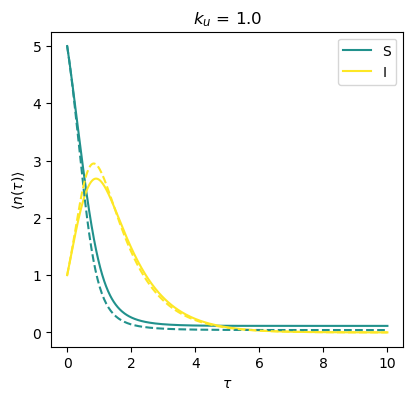

In [31]:
plot_indices = [1]

figure(figsize=(10,9))
for i in range(1,length(plot_indices))
    subplot(2,2,i)
    for j in range(1,length(species(SIR_system)))
        plot(SOL[plot_indices[i]].t, VAR[plot_indices[i]].μ[j, :], label=alpha_range[plot_indices[i]], color=plt.cm.viridis(j / length(species(SIR_system))))
        legend(["S","I"])
        #plot(SOL_mak[plot_indices[i]].t,VAR_mak[plot_indices[i]].μ[j,:],label=alpha_range[plot_indices[i]],"--",color=plt.cm.plasma(j / length(species(enzyme_system))))
    end
    for j in range(1,length(species(SIR_system)))
        plot(SOL_mak[plot_indices[i]].t, VAR_mak[plot_indices[i]].μ[j, :], label=alpha_range[plot_indices[i]], "--", color=plt.cm.viridis(j / length(species(SIR_system))))
    end
    title(L"$k_u$ = " * string(alpha_range[plot_indices[i]]))
    #yscale("log")
    xlabel(L"$\tau$")
    ylabel(L"$\langle n(\tau)\rangle$")
end

gcf()

### Plotting the cross variances $\langle \delta n_i(\tau)\delta n_j(\tau) \rangle$:

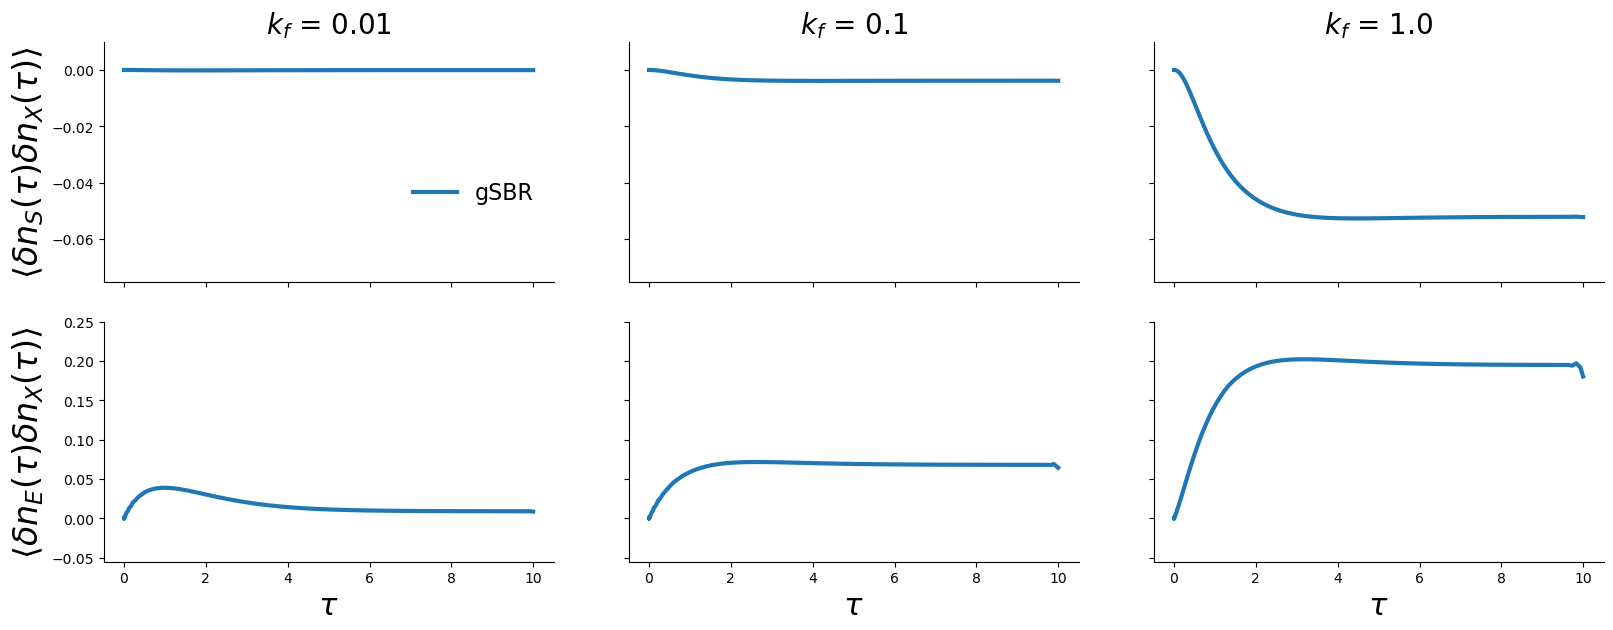

In [ ]:
fig1 = figure(figsize=(15,8))

ax_3 = fig1.add_axes([0.,0, 0.3, 0.3])
ax_4 = fig1.add_axes([0.35,0, 0.3, 0.3])

ax_1 = fig1.add_axes([0.,0.35, 0.3, 0.3])
ax_2 = fig1.add_axes([0.35,0.35, 0.3, 0.3])

ax_5 = fig1.add_axes([0.7,0.35, 0.3, 0.3])

ax_6 = fig1.add_axes([0.7,0., 0.3, 0.3])

# ax_11 = fig1.add_axes([0.,0.7, 0.3, 0.3])
# ax_22 = fig1.add_axes([0.35,0.7, 0.3, 0.3])

# ax_55 = fig1.add_axes([0.7,0.7, 0.3, 0.3])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6]#, ax_11, ax_22, ax_55]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    
    axes[i].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[1,4,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)

    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_ylim((-0.075, 0.01))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
    axes[i].set_title("\$k_f\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
end

axes[1].set_ylabel(L"\langle \delta n_S(\tau)\delta n_X(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+3].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[2,4,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)

    axes[i+3].spines["right"].set_visible(false)
    axes[i+3].spines["top"].set_visible(false)
    axes[i+3].set_xlabel(L"\tau", fontsize=22)
    axes[i+3].set_ylim((-0.055, 0.25))
    if i != 1
        axes[i+3].set(yticklabels=[])
    end
end

axes[4].set_ylabel(L"\langle \delta n_{E}(\tau)\delta n_X(\tau) \rangle", fontsize=24)

ax_1.legend(["gSBR"], bbox_to_anchor=(1., 0.5), loc=1, frameon=false, fontsize=16, ncol=1)

gcf()


In [32]:
close("all")

### Plotting the two-time correlator XX $\langle \delta n_X(\tau) \delta n_X(\tau^\prime) \rangle$ :

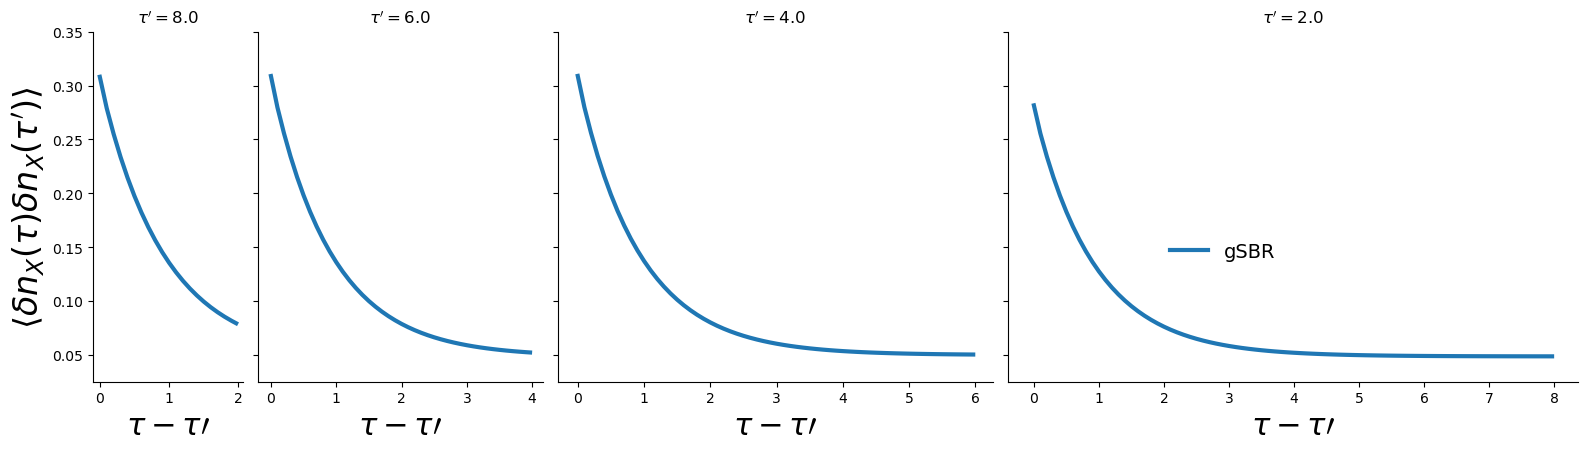

In [63]:
sat = 7

time_grid_gSBR = SOL[sat].t
#plotting_tau =  [0.75, 1.5, 2.25, 3.0]
plotting_tau =  [2., 4., 6., 8.]

function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(tau_SBR)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].N[4, 4, tau_SBR[j]:end, tau_SBR[j]], "-", alpha=1.,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]))
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((0.025, 0.35))
end

ax1.set_ylabel(L"\langle \delta n_X(\tau) \delta n_X(\tau^\prime) \rangle ", fontsize=24)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.5, 0.45), loc=0, frameon=false, fontsize=14)

gcf()

In [67]:
close("all")

### Plotting the response: $R_{XX}(\tau,\tau')$:

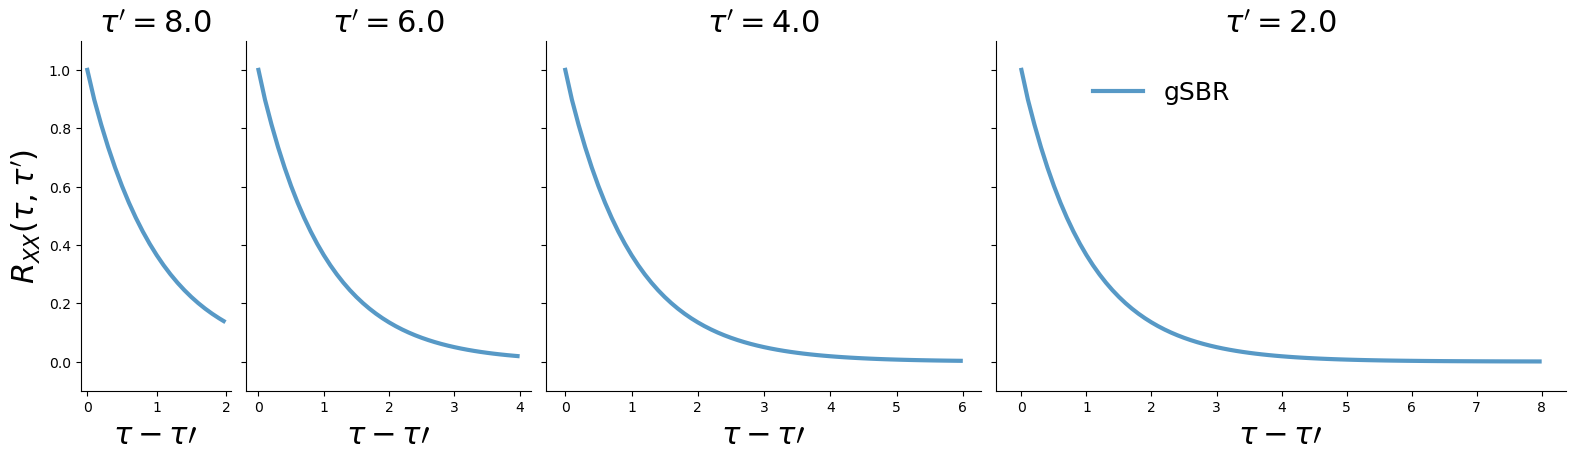

In [ ]:
sat = 7

#time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

#tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[4, 4, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 1.1))
end

ax1.set_ylabel(L"R_{XX}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()

## Plotting cross-responses!

In [ ]:
sat = 7

#time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

#tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0.55, 0.1, 0.45])
ax2 = fig.add_axes([0.11, 0.55, 0.19, 0.45])
ax3 = fig.add_axes([0.31, 0.55, 0.29, 0.45])
ax4 = fig.add_axes([0.61, 0.55, 0.38, 0.45])

ax11 = fig.add_axes([0, 0., 0.1, 0.45])
ax22 = fig.add_axes([0.11, 0., 0.19, 0.45])
ax33 = fig.add_axes([0.31, 0., 0.29, 0.45])
ax44 = fig.add_axes([0.61, 0., 0.38, 0.45])

axis = [ax4, ax3, ax2, ax1]

axis2 = [ax44, ax33, ax22, ax11]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[4,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    #axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 0.1))
end

for j in 1:length(plotting_tau)

    axis2[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[2,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis2[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis2[j].spines["right"].set_visible(false)
    axis2[j].spines["top"].set_visible(false)
    axis2[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis2[j].set_ylim((-0.135, 0.01))
end

ax1.set_ylabel(L"R_{XS}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])
ax1.set(xticklabels=[])
ax2.set(xticklabels=[])
ax3.set(xticklabels=[])
ax4.set(xticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

ax11.set_ylabel(L"R_{XS}(\tau,\tau^\prime)", fontsize=22)
ax22.set(yticklabels=[])
ax33.set(yticklabels=[])
ax44.set(yticklabels=[])

#ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


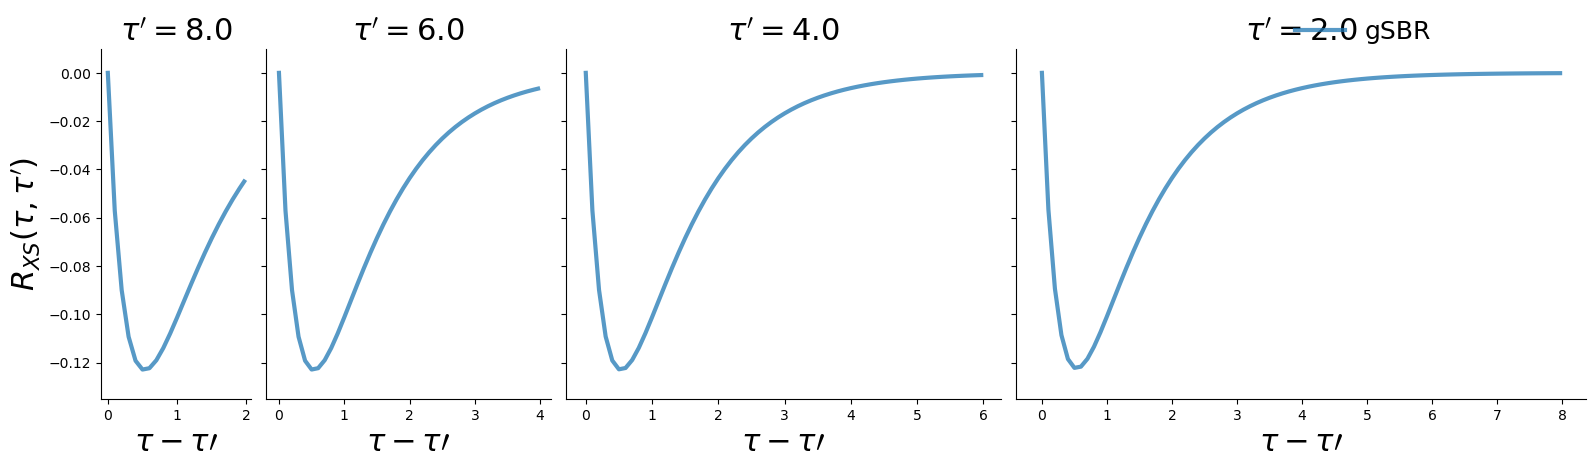

In [13]:
sat = 7

#time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [2., 4., 6., 8.]

function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

#tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[2,1, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.135, 0.01))
end

ax1.set_ylabel(L"R_{XS}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


In [4]:
close("all")

MethodError: MethodError: no method matching close(::String)
The function `close` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  close(!Matched::Base.Libc.FILE)
   @ Base libc.jl:131
  close(!Matched::Base64.Base64EncodePipe)
   @ Base64 ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Base64/src/encode.jl:110
  close(!Matched::LibGit2.GitDescribeResult)
   @ LibGit2 ~/.julia/juliaup/julia-1.11.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LibGit2/src/types.jl:1070
  ...


## Compare with other dynamical methods:

Note that now we use other libraries and code written in python for the implementation of other dynamical methods. They are NOT originally intended to be a part of the package.

In [19]:
using PyCall
using Pkg
using Conda

py"""
import sys
sys.path.append("../extras/other_dynamics")
"""

@pyimport cheMASTER
@pyimport emre

@pyimport numpy as np
@pyimport importlib

ArgumentError: ArgumentError: Package PyCall not found in current path.
- Run `import Pkg; Pkg.add("PyCall")` to install the PyCall package.

In [34]:
# Setting up the reactions and the parameters:

num_species     = 2 #Number of species in the reaction system
num_interaction = 1 # Number of interating reactions in the Hamiltonian
num_reactions   = 2*num_species + num_interaction # This counts the total number of possible reactions in the system.
                                        # We have 2N creation and destruction reactions and the rest interaction reactions

# We take the order to be G,G*,P

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([0.,0.]) #len must be equal to num_species
k2 = np.array([0.,1.]) #len must be equal to num_species

k3 = np.array([0.75]) 
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])
rxn_par = [k1,k2,k3]

s_i[1,:] = [0,2] 
r_i[1,:] = [1,1]

#The initial concentration of the species. 
#Note: for Gillespie we start each trajectory from a Poisonian random variable with mean as the initial conc.below:
initial_values = np.array([5.,1.])

dt = 0.05
tf = 10.

10.0

In [35]:
#Run some Gillespie simulations
num_gill = 100
gill     = []

for i in range(1,num_gill)
    push!(gill,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.gillespie_avg(gill[i],1,initial_values,0,tf,dt,10000)
    print(gill[i])
end

PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f3a98680>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f33e4560>

100%|##########| 1/1 [00:00<00:00, 5005.14it/s]


PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f3a4f1d0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f1c6af60>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f340ccb0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f25f00b0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f1e04e90>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d66b3aa0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d65ffc20>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f3a24cb0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d660ce30>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3d660ce60>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f34c27b0>PyObject <cheMASTER.chemical_system.chemical_system_class object at 0x3f3a84bc0>PyObject <cheMASTER.chemical_system.chem

100%|##########| 1/1 [00:00<00:00, 3449.26it/s]


In [36]:
#Plot settings!

cmap = plt.get_cmap("tab10")
col = [cmap(i) for i in np.linspace(0, 1, num_gill-75)]

original_rcParams = copy(plt.rcParams)
rcParams = PyDict(matplotlib["rcParams"])

plot_params = Dict("font.size" => 70, "font.family" => "sans-serif", "text.usetex" => true, "font.weight" => 900, "axes.linewidth" => 2, "xtick.major.width" => 3, "xtick.major.size" => 5, "xtick.minor.width" => 2, "xtick.minor.size" => 3, "ytick.major.width" => 3, "ytick.major.size" => 5, "ytick.minor.width" => 2, "ytick.minor.size" => 3, "axes.labelsize" => 18, "xtick.labelsize" => 18, "ytick.labelsize" => 18)
plot_params2 = (Dict(
    "text.usetex" => false,
    "xtick.labelsize" => 20,
    "ytick.labelsize" => 20,
    "xtick.major.width" => 3,
    "ytick.major.width" => 3,
    "xtick.major.size" => 10,
    "ytick.major.size" => 10,
    "xtick.direction" => "in",
    "ytick.direction" => "in",
    "font.size" => 30,
    "figure.autolayout" => true,
    "figure.figsize" => (10, 5),
    "axes.titlesize" => 20,
    "axes.labelsize" => 20,
    "lines.linewidth" => 3,
    "lines.markersize" => 3,
    "legend.fontsize" => 13,
    "mathtext.fontset" => "stix",
    "axes.linewidth" => 3
))

merge!(rcParams,plot_params)
merge!(rcParams,plot_params2)

PyDict{PyAny, PyAny, true} with 318 entries:
  "webagg.port"            => 8988
  "webagg.address"         => "127.0.0.1"
  "webagg.port_retries"    => 50
  "webagg.open_in_browser" => true
  "backend_fallback"       => false
  "interactive"            => false
  "figure.hooks"           => Any[]
  "toolbar"                => "toolbar2"
  "timezone"               => "UTC"
  "lines.linewidth"        => 3.0
  "lines.linestyle"        => "-"
  "lines.color"            => "C0"
  "lines.marker"           => "None"
  "lines.markerfacecolor"  => "auto"
  "lines.markeredgecolor"  => "auto"
  "lines.markeredgewidth"  => 1.0
  "lines.markersize"       => 3.0
  "lines.dash_joinstyle"   => "round"
  "lines.dash_capstyle"    => "butt"
  ⋮                        => ⋮

In [37]:
#import matplotlib


fig1  = plt.figure(figsize=(15,8))

ax_1 = fig1.add_axes([0.,0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35,0.525, 0.3, 0.4])
ax_3 = fig1.add_axes([0.7,0.525, 0.3, 0.4])
ax_0 = 0
axes = [ax_1,ax_2,ax_0,ax_3]
sat  = [0,3,6]
skip = 2
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in range(1,num_species)
    if i != 3
        for j in range(1,num_gill-75)
            if all(gill[j].y[1,:] .- 3 .< 0.)
                #axes[i].plot(gill[j].timeGrid, gill[j].y[i,:], "--", c=colors[j], alpha=1., linewidth=3)
                axes[i].plot(gill[j].timeGrid[1:skip:end], gill[j].y[i,1:skip:end], "--", c=col[j], alpha=1., linewidth=3)
            end
        end
        axes[i].spines["right"].set_visible(false)
        axes[i].spines["top"].set_visible(false)
        #axes[i].set_title("Enzyme Sat = "+str(np.round(enzyme_sat[sat[i]],2)))
        #axes[i].set_title("$k_u$ = "+str(np.round(alpha_range[sat[i]],2)),fontsize=20)
        axes[i].set_xlabel(L"${\tau}$",fontsize=22)
    end
end
axes[1].set_ylabel(L"$n_S$",fontsize=28)
axes[2].set_ylabel(L"$n_{E}$",fontsize=28)
axes[4].set_ylabel(L"$n_X$",fontsize=28)
plt.savefig("../plots/SIR/enzyme_gillespie_new.png",bbox_inches="tight")
plt.close()

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /Users/harsh/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'FileNotFoundError'>
FileNotFoundError(2, 'No such file or directory')
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/pyplot.py", line 1228, in savefig
    res = fig.savefig(*args, **kwargs)  # type: ignore[func-returns-value]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/figure.py", line 3395, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/backend_bases.py", line 2204, in print_figure
    result = print_method(
             ^^^^^^^^^^^^^
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/backend_bases.py", line 2054, in <lambda>
    print_method = functools.wraps(meth)(lambda *args, **kwargs: meth(
                                                                 ^^^^^
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 496, in print_png
    self._print_pil(filename_or_obj, "png", pil_kwargs, metadata)
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/backends/backend_agg.py", line 445, in _print_pil
    mpl.image.imsave(
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/matplotlib/image.py", line 1676, in imsave
    image.save(fname, **pil_kwargs)
  File "/Users/harsh/.julia/conda/3/aarch64/lib/python3.12/site-packages/PIL/Image.py", line 2563, in save
    fp = builtins.open(filename, "w+b")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


## Run Master equation and EMRE solutions:

In [45]:
Master = []

for i in range(1,length(alpha_range))

    #rxn_par[3][1] = alpha_range[i]
    
    push!(Master,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    print("ex ",i,"\n")
    
    cheMASTER.initialize_dynamics(Master[i],initial_values,0,tf,dt)
    print("ex ",i,"\n")
    #cheMASTER.runDynamics(Master[i],max_num=[5,5,4,4],method = "Eigenvalue",crossCorrelator_tau=false,variance=true)
    
    cheMASTER.runDynamics(Master[i],max_num=[20,15],method = "RK4",crossCorrelator_tau="connected",variance=true)
    #cheMASTER.runDynamics(Master[i],max_num=[20,15],method = "Eigenvalue",crossCorrelator_tau="connected",variance=true)
    #Why is this executing sooo slowly?
    print(i,"\n")
    
end

ex 1
ex 1
1


100%|##########| 200/200 [00:00<00:00, 4951.57it/s]


In [41]:
open("../data/SIR/master.jls", "w") do f
    serialize(f, Master)
end

In [42]:
EMRE   = []

for i in range(1,length(alpha_range))
    
    #rxn_par[3][1] = alpha_range[i]
    push!(EMRE,emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    emre.initialize_dynamics(EMRE[i],initial_values,0,tf,dt,alpha=1.,volume=1.,measureResponse=true,crossCorrelator_tau=true)
    emre.runDynamics(EMRE[i])

    println(i)
end

1


199it [00:00, 1654.39it/s]                         


In [43]:
open("../data/SIR/emre.jls", "w") do f
    serialize(f, EMRE)
end

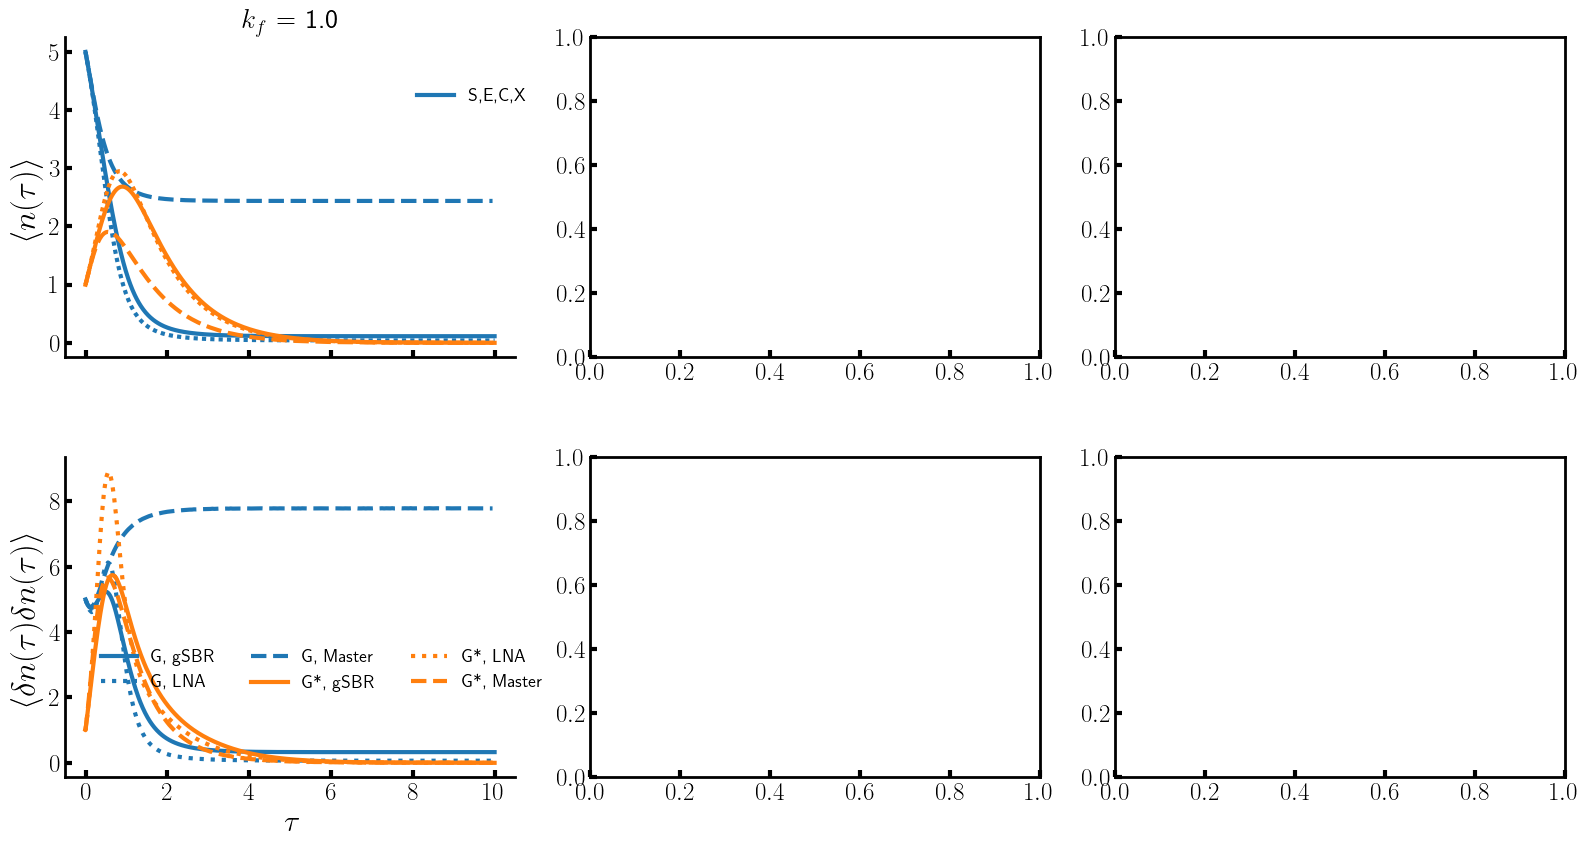

sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [46]:
plot_params3 = (Dict(
    "font.size" => 20,
    "font.family" => "sans-serif",
    "text.usetex" => true,
    "font.weight" => 900,
    "axes.linewidth" => 2,
    "xtick.major.width" => 3,
    "xtick.major.size" => 5,
    "xtick.minor.width" => 2,
    "xtick.minor.size" => 3,
    "ytick.major.width" => 3,
    "ytick.major.size" => 5,
    "ytick.minor.width" => 2,
    "ytick.minor.size" => 3,
    "axes.labelsize" => 18,
    "xtick.labelsize" => 18,
    "ytick.labelsize" => 18,
    "font.size" => 20,
))

rcParams = PyDict(matplotlib["rcParams"])
merge!(rcParams, plot_params3)

fig1 = plt.figure(figsize=(15, 8))

ax_3 = fig1.add_axes([0., 0, 0.3, 0.4])
ax_4 = fig1.add_axes([0.35, 0, 0.3, 0.4])

ax_1 = fig1.add_axes([0., 0.525, 0.3, 0.4])
ax_2 = fig1.add_axes([0.35, 0.525, 0.3, 0.4])

ax_5 = fig1.add_axes([0.7, 0.525, 0.3, 0.4])

ax_6 = fig1.add_axes([0.7, 0., 0.3, 0.4])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6]
#sat = [0, 3, 6] .+ 1
#sat = [3, 6, 9] .+ 1
sat = 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], QUAD2SBR[sat[i]].y[j, 1:skip:end]', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i].plot(SOL[sat[i]].t, VAR[sat[i]].μ[j, :], linestyle="-", c=cOL[j], alpha=1., linewidth=3)

        #axes[i].plot(MAK[sat[i]].timeGrid[1:skip:end], MAK[sat[i]].y[j, 1:skip:end]', linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        
        axes[i].plot(SOL_mak[sat[i]].t, VAR_mak[sat[i]].μ[j, :], linestyle=(0, (1, 1)), c=cOL[j], alpha=1., linewidth=3)
        
        axes[i].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].y[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_title("\$k_f\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    #axes[i].set_yscale("log")
    #axes[i].set_xscale("log")
    #axes[i].set_ylim((0.002, 2.50))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end
axes[1].set_ylabel(L"$ \langle n(\tau) \rangle $", fontsize=24)

for i in 1:length(sat)
    for j in 1:num_species
        #axes[i + 3].plot(QUAD2SBR[sat[i]].timeGrid[1:skip:end], (QUAD2SBR[sat[i]].y[j, 1:skip:end] + diag(QUAD2SBR[sat[i]].corr[j, j, 1:skip:end, 1:skip:end]))', linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        
        axes[i + 3].plot(SOL[sat[i]].t, diag(VAR[sat[i]].N[j, j, :, :]), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        
        #axes[i + 3].plot(SOL[sat[i]].t, (VAR[sat[i]].μ[j,:]), linestyle="-", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[j, j, 1:skip:end]', linestyle="dotted", c=cOL[j], alpha=1., linewidth=3)
        axes[i + 3].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].variance[j, 1:skip:end]', "--", c=cOL[j], alpha=1., linewidth=3)
    end
    axes[i + 3].spines["right"].set_visible(false)
    axes[i + 3].spines["top"].set_visible(false)
    axes[i + 3].set_xlabel(L"$ \tau $", fontsize=22)
    #axes[i + 3].set_yscale("log")
    #axes[i + 3].set_xscale("log")
    #axes[i + 3].set_ylim((0.002, 5.))
    if i != 1
        axes[i + 3].set(yticklabels=[])
    end
end
axes[4].set_ylabel(L"$\langle \delta n(\tau)\delta n(\tau) \rangle $", fontsize=24)

axes[1].legend(["S,E,C,X"], bbox_to_anchor=(1.06, 0.89), loc=1, frameon=false, fontsize=13, ncol=3)
#axes[1].legend(["G, gSBR", "G, MAK", "G, Master", "G*, gSBR", "G*, MAK", "G*, Master", "P, gSBR", "P, MAK", "P, Master"], bbox_to_anchor=(1.06, 0.89), loc=1, frameon=false, fontsize=13, ncol=3)
axes[4].legend(["G, gSBR","G, LNA","G, Master","G*, gSBR","G*, LNA","G*, Master","P, gSBR","P, LNA","P, Master"],bbox_to_anchor=(1.1, 0.45), loc=1, frameon=false, fontsize=13,ncol=3)

gcf()

#plt.savefig("../plots/gene/gene_means_variance.png", bbox_inches="tight")
#plt.close()


In [51]:
function find_closed_timegrid_indices(timegrid, times)
    return [findmin(abs.(timegrid .- X))[2] for X in times]
end

find_closed_timegrid_indices (generic function with 1 method)

In [72]:
sat = 4

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [0.75, 1.5, 2.25, 3.0]

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(tau)
    
    #[TODO] Change this!

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].C[3, 3, tau_SBR[j]:end, tau_SBR[j]] + VAR[sat].μ[3, tau_SBR[j]].*(VAR[sat].R[3, 3, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)
    
    #axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]], VAR[sat].N[3, 3, tau_SBR[j]:end, tau_SBR[j]], "-", alpha=0.75)

    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].corr[3, 3, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)

    axis[j].plot(Master[sat].timeGrid[1:end-tau[j]], Master[sat].correlator_tau[3, 3, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)

    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]))
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 2))
end

ax1.set_ylabel(L"\langle \delta n_P(\tau) \delta n_P(\tau^\prime) \rangle ", fontsize=24)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.5, 0.45), loc=0, frameon=false, fontsize=14)

plt.savefig("../plots/gene/gene_num_corr_P.png", bbox_inches="tight")
plt.close()

In [48]:
fig1 = figure(figsize=(15,8))

ax_3 = fig1.add_axes([0.,0, 0.3, 0.3])
ax_4 = fig1.add_axes([0.35,0, 0.3, 0.3])

ax_1 = fig1.add_axes([0.,0.35, 0.3, 0.3])
ax_2 = fig1.add_axes([0.35,0.35, 0.3, 0.3])

ax_5 = fig1.add_axes([0.7,0.35, 0.3, 0.3])

ax_6 = fig1.add_axes([0.7,0., 0.3, 0.3])

ax_11 = fig1.add_axes([0.,0.7, 0.3, 0.3])
ax_22 = fig1.add_axes([0.35,0.7, 0.3, 0.3])

ax_55 = fig1.add_axes([0.7,0.7, 0.3, 0.3])

axes = [ax_1, ax_2, ax_5, ax_3, ax_4, ax_6, ax_11, ax_22, ax_55]
sat = [0, 3, 6] .+ 1
skip = 1
cOL = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i in 1:length(sat)
    
    axes[i].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[1,3,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[1,3,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i].plot(Master[sat[i]].timeGrid[1:end], Master[sat[i]].correlator_tau[1,3,1,1:end], "--", c="gray", alpha=1., linewidth=3)
    #axes[i].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].correlator_tau[1,3,1:skip:end,1], "--", c="gray", alpha=1., linewidth=3)


    axes[i].spines["right"].set_visible(false)
    axes[i].spines["top"].set_visible(false)
    axes[i].set_ylim((-0.055, 0.75))
    axes[i].set(xticklabels=[])
    if i != 1
        axes[i].set(yticklabels=[])
    end
end

axes[1].set_ylabel(L"\langle \delta n_G(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+3].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[2,3,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i+3].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[2,3,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i+3].plot(Master[sat[i]].timeGrid[1:end], Master[sat[i]].correlator_tau[2,3,1,1:end], "--", c="gray", alpha=1., linewidth=3)
    #axes[i+3].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].correlator_tau[2,3,1:skip:end,1], "--", c="gray", alpha=1., linewidth=3)


    axes[i+3].spines["right"].set_visible(false)
    axes[i+3].spines["top"].set_visible(false)
    axes[i+3].set_xlabel(L"\tau", fontsize=22)
    axes[i+3].set_ylim((-0.055, 0.65))
    if i != 1
        axes[i+3].set(yticklabels=[])
    end
end

axes[4].set_ylabel(L"\langle \delta n_{G^*}(\tau)\delta n_P(\tau) \rangle", fontsize=24)

for i in 1:length(sat)
    axes[i+6].plot(SOL[sat[i]].t[1:skip:end], diag(VAR[sat[i]].N[1,2,1:skip:end,1:skip:end]), linestyle="-", c=cOL[1], alpha=1., linewidth=3)
    axes[i+6].plot(EMRE[sat[i]].timeGrid[1:skip:end], EMRE[sat[i]].lna_var[1,2,1:skip:end], linestyle="dashdot", c=cOL[2], alpha=1., linewidth=3)
    axes[i+6].plot(Master[sat[i]].timeGrid[1:skip:end], Master[sat[i]].correlator_tau[1,2,1,1:end], "--", c="gray", alpha=1., linewidth=3)

    axes[i+6].spines["right"].set_visible(false)
    axes[i+6].spines["top"].set_visible(false)
    axes[i+6].set(xticklabels=[])
    axes[i+6].set_title("\$k_u\$ = " * string(round(alpha_range[sat[i]], digits=2)), fontsize=20)
    axes[i+6].set_ylim((-0.027, 0.04))
    if i != 1
        axes[i+6].set(yticklabels=[])
    end
end

axes[7].set_ylabel(L"\langle \delta n_G(\tau)\delta n_{G^*}(\tau) \rangle", fontsize=24)

ax_1.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(1., 0.75), loc=1, frameon=false, fontsize=16, ncol=1)

plt.savefig("../plots/gene/gene_equal_time_corr.png", bbox_inches="tight")
plt.close()


In [49]:
Master_response = []

#This is calculation intensive, be careful!

for i in range(1,length(alpha_range))
    
    rxn_par[3][3] = alpha_range[i]
    rxn_par[1]    = rxn_par[1] .+ 0.001

    push!(Master_response,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(Master_response[i],initial_values,0,tf,0.1*dt)
    cheMASTER.runDynamics(Master_response[i],max_num=[10,10,20],method = "Euler",measureResponse="finite-cross",measureResponse_par=[1.1,1])
    
    println(i)

end
rxn_par[1] = k1

1


100%|##########| 70/70 [07:30<00:00,  6.44s/it]


2


100%|##########| 70/70 [07:30<00:00,  6.44s/it]


3


100%|##########| 70/70 [07:24<00:00,  6.35s/it]


4


100%|##########| 70/70 [07:20<00:00,  6.29s/it]


5


100%|##########| 70/70 [07:20<00:00,  6.29s/it]


6


100%|##########| 70/70 [07:26<00:00,  6.38s/it]


7


100%|##########| 70/70 [07:26<00:00,  6.37s/it]


8


100%|##########| 70/70 [07:26<00:00,  6.38s/it]


9


100%|##########| 70/70 [07:23<00:00,  6.33s/it]


10


100%|##########| 70/70 [07:23<00:00,  6.34s/it]


Base.Meta.ParseError: ParseError:
# Error @ /Users/harsh/Work/code/achedmy/examples/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y143sZmlsZQ==.jl:18:34
open("../data/gene/Master_response.jls", "w") do f
    serialize(f, Master_response)
#                                └ ── Expected `end`

In [ ]:
i = 6 

rxn_par[3][3] = alpha_range[i]
rxn_par[1]    = rxn_par[1] .+ 0.001

Master_response[i] = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
#push!(Master_response,cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
cheMASTER.initialize_dynamics(Master_response[i],initial_values,0,tf,0.1*dt)
cheMASTER.runDynamics(Master_response[i],max_num=[10,10,20],method = "Euler",measureResponse="finite-cross",measureResponse_par=[1.1,1])

rxn_par[1] = k1

In [52]:
open("../data/gene/Master_response.jls", "w") do f
    serialize(f, Master_response)
end

In [ ]:
sat = 6

time_grid_all = EMRE[sat].timeGrid
time_grid_gSBR = SOL[sat].t
plotting_tau =  [0.75, 1.5, 2.25, 3.0]

tau = find_closed_timegrid_indices(time_grid_all, plotting_tau)
tau_SBR = find_closed_timegrid_indices(time_grid_gSBR, plotting_tau)

fig = figure(figsize=(15, 3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])

axis = [ax4, ax3, ax2, ax1]

for j in 1:length(plotting_tau)

    axis[j].plot(time_grid_gSBR[tau_SBR[j]:end] .- time_grid_gSBR[tau_SBR[j]],(VAR[sat].R[3, 3, tau_SBR[j]:end, tau_SBR[j]]), "-", alpha=0.75,linewidth=3)

    axis[j].plot(time_grid_all[1:end-tau[j]], EMRE[sat].resp[3, 3, tau[j]+1:end, tau[j]], linestyle="dashdot", alpha=0.75,linewidth=3)

    axis[j].plot(Master_response[sat].timeGrid[1:end-tau[j]], Master_response[sat].Response[3, 3, 1:end-tau[j], tau[j]], "--", alpha=0.75, color="gray",linewidth=3)
    
    #axis[j].plot(time_grid_all[1:end-tau[j]], respALL_2[2, 2, 1:end-tau[j], tau[j]], "-", alpha=1., linewidth=3)
    #axis[j].plot(time_grid_all[1:end-tau[j]], respLNA_2[2, 2, 1:end-tau[j], tau[j]], linestyle="dashdot", alpha=1., linewidth=3)
    #axis[j].plot(time_grid_all[1:end-tau[j]], respME_2[2, 2, 1:end-tau[j], tau[j]], "--", alpha=1., linewidth=3, color="gray")
    
    axis[j].set_title(L"\tau^\prime = " * string(plotting_tau[j]), fontsize=22)
    axis[j].spines["right"].set_visible(false)
    axis[j].spines["top"].set_visible(false)
    axis[j].set_xlabel(L"\tau-\tau\prime", fontsize=22)
    axis[j].set_ylim((-0.1, 1.))
end

ax1.set_ylabel(L"R_{PP}(\tau,\tau^\prime)", fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax4.legend(["gSBR", "LNA", "Master"], bbox_to_anchor=(0.45, 0.95), loc=0, frameon=false, fontsize=18)

gcf()


In [ ]:
close()

### Plotting the time averaged trajectory errors:


In [ ]:
#import Pkg; Pkg.add("Interpolations")
using Interpolations

function time_averaged_trajectory_error(sys_mean, sys_t, sys_ref_mean, sys_ref_t)
    #Interpolates the timegrid of sys_ref to sys and calculates the error

    interp_ref_mean = interpolate((sys_ref_t,), sys_ref_mean, Gridded(Linear()))

    interp_ref_mean_vals = [interp_ref_mean(sys_t[i]) for i in 1:length(sys_t) if sys_t[i] < maximum(sys_ref_t)]

    error = sum(abs, sys_mean[1:length(interp_ref_mean_vals)] ./ interp_ref_mean_vals .- 1 ) / length(sys_t)
    
    return error

end

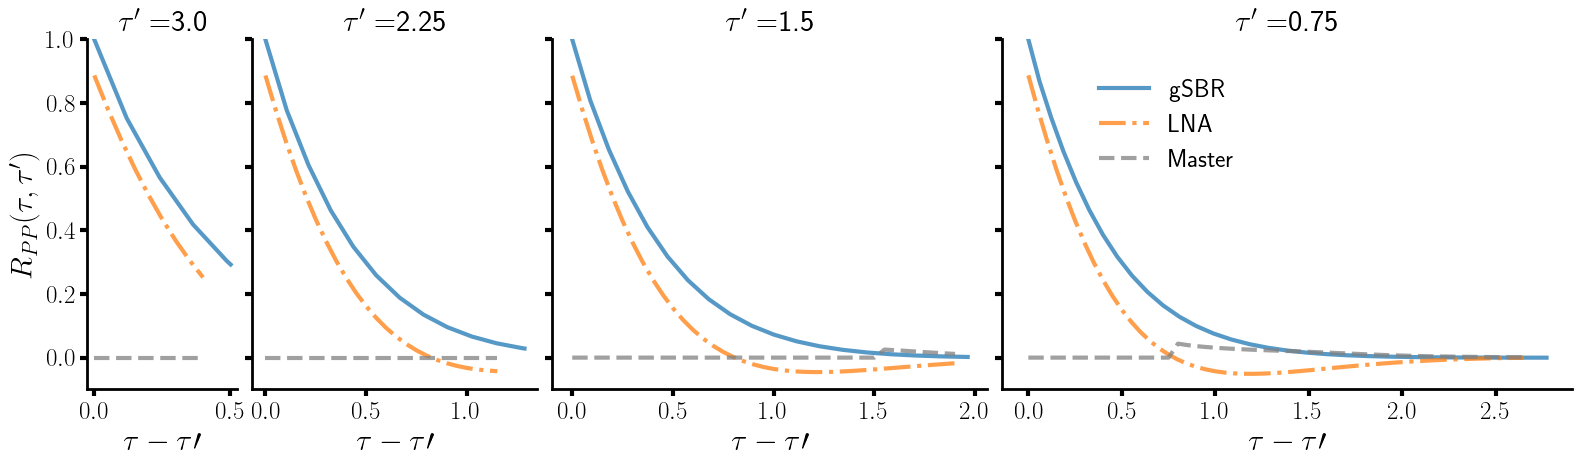

In [67]:
close()